# Practica 06: Preparacion de Datos para su Analisis (ETL)

**Asignatura:** Extracción de Conocimiento en Bases de Datos  
Unidad 2: Preparación de los Datos  
PE: Ingeniería Desarrollo y Gestión de Software I  
Realizado por: **Carolina Arias Reyes**: - 220159

## 1. Importacion de las librerias y paquetes a utilizar para el analisis de datos

In [168]:
# Práctica 06: Preparación de Datos para su Análisis (ETL)

# 1. Importación de las Librerías y Paquetes a utilizar para el análisis de datos.
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## 2. Ubicacion del origen de los datos

In [169]:
!cd

C:\Users\poxol\Documents\Uni\ECBD\9A IDGS ECBD\9A IDGS ECBD\Practica06


In [170]:
!dir

 El volumen de la unidad C no tiene etiqueta.
 El número de serie del volumen es: DE0A-F11E

 Directorio de C:\Users\poxol\Documents\Uni\ECBD\9A IDGS ECBD\9A IDGS ECBD\Practica06

18/06/2025  08:39 a. m.    <DIR>          .
17/06/2025  08:10 p. m.    <DIR>          ..
17/06/2025  08:10 p. m.    <DIR>          .ipynb_checkpoints
18/06/2025  08:39 a. m.         4,127,881 salaries.csv
18/06/2025  08:39 a. m.           993,844 Untitled.ipynb
               2 archivos      5,121,725 bytes
               3 dirs  925,979,373,568 bytes libres


## 3. Construccion y consulta del dataframe

In [171]:
# Importación y acceso a un DataFrame (Matrix)
df = pd.read_csv("salaries.csv")

In [172]:
# Consultas básicas y metadatos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73160 entries, 0 to 73159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73158 non-null  float64
 1   experience_level    73156 non-null  object 
 2   employment_type     73156 non-null  object 
 3   job_title           73158 non-null  object 
 4   salary              73148 non-null  float64
 5   salary_currency     73158 non-null  object 
 6   salary_in_usd       73148 non-null  float64
 7   employee_residence  73158 non-null  object 
 8   remote_ratio        73158 non-null  float64
 9   company_location    73158 non-null  object 
 10  company_size        73158 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


In [173]:
# Cuantos registros tenemos? (tuplas, iterables)
df.size

804760

In [174]:
print(len(df))
#Devuelve el total de tuplas o registros

73160


Consultas Basicas sobre el Dataframe

In [175]:
df.head() #Devulvelos primeros 5 registros o tuplas de datos frame

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,MX,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M


In [176]:
df.tail() ## Devuelve los ultimos datos del DataFrame, si no se especifica cuantos automaticamente devuelve los ultimos 5

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
73155,2025.0,EX,MX,Azure Data Engineer,NaN,MXN,NaN,VN,0.0,ID,S
73156,2025.0,MI,NaN,Software Engineer,NaN,AUD,NaN,UA,100.0,RO,L
73157,2025.0,MI,PT,Consultant Data Engineer,NaN,INR,NaN,FR,100.0,GI,M
73158,2023.0,SE,NaN,Bear Robotics,NaN,CLP,NaN,EE,0.0,SG,M
73159,2022.0,EN,CT,Engineer,NaN,PLN,NaN,FI,100.0,KE,M


In [177]:
df.isnull() ## Mapea la matriz original con una matriz

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
73155,False,False,False,False,True,False,True,False,False,False,False
73156,False,False,True,False,True,False,True,False,False,False,False
73157,False,False,False,False,True,False,True,False,False,False,False
73158,False,False,True,False,True,False,True,False,False,False,False


In [178]:
df.notnull() ## Realiza un mapeo de la matriz original colocando valores bolaneos de acuerdo a la condicion de si es nulo

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
73155,True,True,True,True,False,True,False,True,True,True,True
73156,True,True,False,True,False,True,False,True,True,True,True
73157,True,True,True,True,False,True,False,True,True,True,True
73158,True,True,False,True,False,True,False,True,True,True,True


In [179]:
# Total de registros en el DataFrame
total_registros = len(df)
print(f"Total de registros: {total_registros}")

Total de registros: 73160


## 4. Limpieza de Datos previo al analisis

Eliminacion de datos duplicados

In [180]:
bf_sinduplicados = df.drop_duplicates()

print("Tamaño del DF original", len(df))

print("Tamaño del DF sin duplicados", len(bf_sinduplicados))

print("Registros/Tuplas eliminadas:", len(df) - len(bf_sinduplicados))

Tamaño del DF original 73160
Tamaño del DF sin duplicados 34035
Registros/Tuplas eliminadas: 39125


Importante: la eliminacion de duplicados debe realizarce con extremo cuidado sobre todo con datos agrupados o que no tienen una clave primaria o atributo identificador, por que existe el riesgo de alterar los resultados y tomar decisiones erradas.

Eliminar datos de registros con algun dato vacio en cualquier columna

In [181]:
bf_sinvacios = df.dropna()

print("Tamaño del DF original", len(df))

print("Tamaño del DF sin duplicados", len(bf_sinvacios))

print("Registros/Tuplas eliminadas:", len(df) - len(bf_sinvacios))

Tamaño del DF original 73160
Tamaño del DF sin duplicados 73146
Registros/Tuplas eliminadas: 14


In [182]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73158.000000,7.314800e+04,73148.000000,73158.000000
mean,2023.831133,1.625534e+05,158013.748619,21.590257
std,0.477923,1.925761e+05,72501.304728,41.027708
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [183]:
df_sinsalary = df.dropna(subset=['salary'])

print("Tamaño del DF original", len(df))

print("Tamaño del DF sin duplicados", len(df_sinsalary))

print("Registros/Tuplas eliminadas:", len(df) - len(df_sinsalary))

Tamaño del DF original 73160
Tamaño del DF sin duplicados 73148
Registros/Tuplas eliminadas: 12


Reemplazar valores nulos con uno especifico

In [184]:
df_valoresdeSalarioSustituido = df.fillna(value = 'N/A')

Verificamos los nuevos datos

In [185]:
df_valoresdeSalarioSustituido

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,MX,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73155,2025.0,EX,MX,Azure Data Engineer,N/A,MXN,N/A,VN,0.0,ID,S
73156,2025.0,MI,N/A,Software Engineer,N/A,AUD,N/A,UA,100.0,RO,L
73157,2025.0,MI,PT,Consultant Data Engineer,N/A,INR,N/A,FR,100.0,GI,M
73158,2023.0,SE,N/A,Bear Robotics,N/A,CLP,N/A,EE,0.0,SG,M


Sustitucion de valores

In [186]:
df_valoresdeSalarioSustituido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73160 entries, 0 to 73159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73160 non-null  object
 1   experience_level    73160 non-null  object
 2   employment_type     73160 non-null  object
 3   job_title           73160 non-null  object
 4   salary              73160 non-null  object
 5   salary_currency     73160 non-null  object
 6   salary_in_usd       73160 non-null  object
 7   employee_residence  73160 non-null  object
 8   remote_ratio        73160 non-null  object
 9   company_location    73160 non-null  object
 10  company_size        73160 non-null  object
dtypes: object(11)
memory usage: 6.1+ MB


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73160 entries, 0 to 73159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73158 non-null  float64
 1   experience_level    73156 non-null  object 
 2   employment_type     73156 non-null  object 
 3   job_title           73158 non-null  object 
 4   salary              73148 non-null  float64
 5   salary_currency     73158 non-null  object 
 6   salary_in_usd       73148 non-null  float64
 7   employee_residence  73158 non-null  object 
 8   remote_ratio        73158 non-null  float64
 9   company_location    73158 non-null  object 
 10  company_size        73158 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.1+ MB


Que pasaria si con el nuevo DataFrame ejecuti un nuevo describe?

In [188]:

df_valoresdeSalarioSustituido.describe()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,73160.0,73160,73160,73160,73160.0,73160,73160.0,73160,73160.0,73160,73160
unique,7.0,6,6,290,7095.0,26,7703.0,94,4.0,87,4
top,2024.0,SE,FT,Data Scientist,160000.0,USD,160000.0,US,0.0,US,M
freq,62229.0,42923,72810,11443,1437.0,69418,1426.0,65982,57222.0,66035,70541


Sustitucion de salarios null a 0.0

In [189]:
df_valoresdeSalarioSustituidoporCero = df.fillna({'salary': 0.0, 'salary_in_usd': 0.0})

In [190]:
df_valoresdeSalarioSustituidoporCero

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
1,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
2,2025.0,SE,FT,Data Product Owner,170000.0,USD,170000.0,US,0.0,US,M
3,2025.0,SE,FT,Data Product Owner,110000.0,USD,110000.0,US,0.0,US,M
4,2025.0,MX,FT,Engineer,143000.0,USD,143000.0,US,0.0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
73155,2025.0,EX,MX,Azure Data Engineer,0.0,MXN,0.0,VN,0.0,ID,S
73156,2025.0,MI,NaN,Software Engineer,0.0,AUD,0.0,UA,100.0,RO,L
73157,2025.0,MI,PT,Consultant Data Engineer,0.0,INR,0.0,FR,100.0,GI,M
73158,2023.0,SE,NaN,Bear Robotics,0.0,CLP,0.0,EE,0.0,SG,M


In [191]:
df_valoresdeSalarioSustituidoporCero.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73158.000000,7.316000e+04,73160.000000,73158.000000
mean,2023.831133,1.625268e+05,157987.830563,21.590257
std,0.477923,1.925716e+05,72523.594688,41.027708
min,2020.000000,0.000000e+00,0.000000,0.000000
25%,2024.000000,1.068862e+05,106840.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [197]:
df['experience_level'].unique()

array(['SE', 'MX', 'EN', nan, 'MI', 'EX'], dtype=object)

In [198]:
df['experience_level'].value_counts(dropna=False)

experience_level
SE     42923
MI     21854
EN      6879
EX      1498
NaN        4
MX         2
Name: count, dtype: int64

In [199]:
valores_permitidos = ['SE', 'EN', 'MI', 'EX']

df_soloexperienciacorrecta = df[df['experience_level'].isin(valores_permitidos)]

In [201]:
df_soloexperienciacorrecta['experience_level'].value_counts(dropna=False)

experience_level
SE    42923
MI    21854
EN     6879
EX     1498
Name: count, dtype: int64

## 5. Analisis Basico del DataFrame (Datos Estadisticos Generales)

Metodo que realiza un reporte de los valores estadisticos basicos (media, conteo, mediana, desciacion, estandar, valor maximo, valor minimo y la concentracion de frecuencia de 25%, 50%, 75% sobre los datos **Cuantitativos** excluyendo loa valores **cualitativos**)

In [125]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73158.000000,7.314800e+04,73148.000000,73158.000000
mean,2023.831133,1.625534e+05,158013.748619,21.590257
std,0.477923,1.925761e+05,72501.304728,41.027708
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.069575e+05,106890.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


## 6. Definir los criterios de analisis (categorias)

In [126]:
analysis_criteria = ['work_year', 'experience_level', 'employment_type', 'job_title',
                'employee_residence', 'company_location', 'company_size']

## 7. Graficamos algo Basico

array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

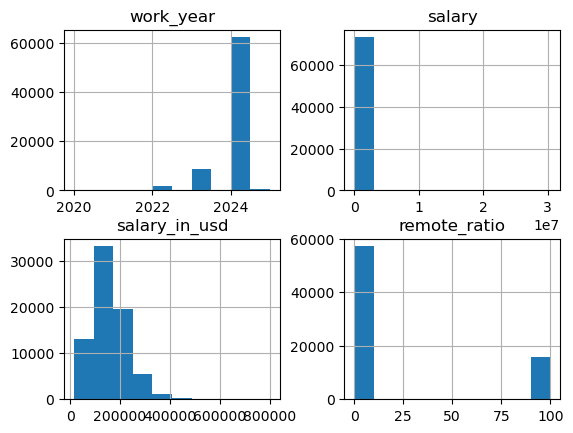

In [202]:
df.hist

Graficamos de una sola categoria cuantitativa, para este caso soolo el año en que se recolectaron los datos sobre el trabajadpr('work_year')

In [211]:
# Aplicamos la limpieza necesaria sobre el DataFrame

df_limpio_graficacion=df.dropna(); # Eliminar nulos
df_limpio_graficacion = df[df['experience_level'].isin(valores_permitidos)]
df_limpio_graficacion['experience_level'].unique()

df_limpio_graficacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73154 entries, 0 to 73159
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           73154 non-null  float64
 1   experience_level    73154 non-null  object 
 2   employment_type     73152 non-null  object 
 3   job_title           73154 non-null  object 
 4   salary              73144 non-null  float64
 5   salary_currency     73154 non-null  object 
 6   salary_in_usd       73144 non-null  float64
 7   employee_residence  73154 non-null  object 
 8   remote_ratio        73154 non-null  float64
 9   company_location    73154 non-null  object 
 10  company_size        73154 non-null  object 
dtypes: float64(4), object(7)
memory usage: 6.7+ MB


array([[<Axes: title={'center': 'work_year'}>]], dtype=object)

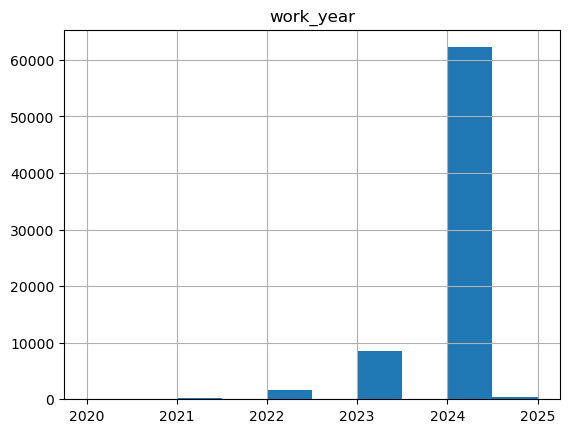

In [214]:
df_limpio_graficacion.hist(column="work_year")

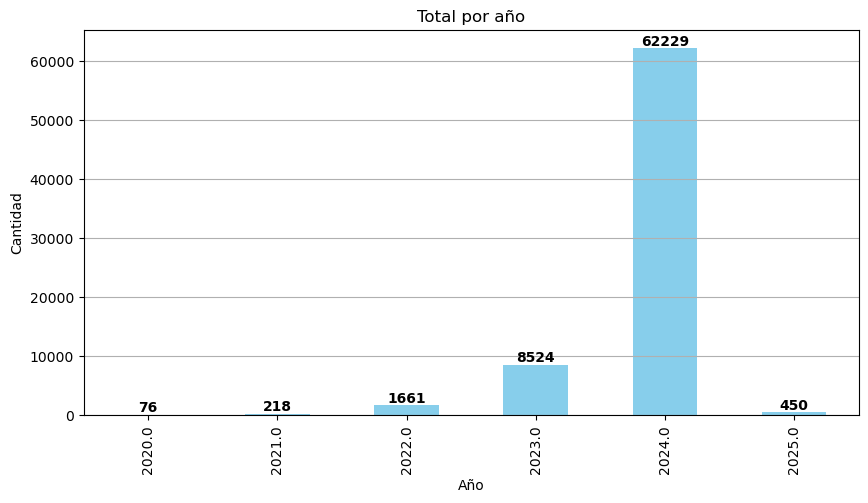

In [219]:
counts = df["work_year"].value_counts().sort_index()
ax = counts.plot(kind="bar", figsize=(10, 5), color='skyblue')

# Agregar los totales encima
for i, v in enumerate(counts):
    ax.text(i, v + 500, str(v), ha='center', fontweight='bold')

plt.title("Total por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.grid(axis='y')
plt.show()


In [ ]:
df_limpio_graficacion['work_year']

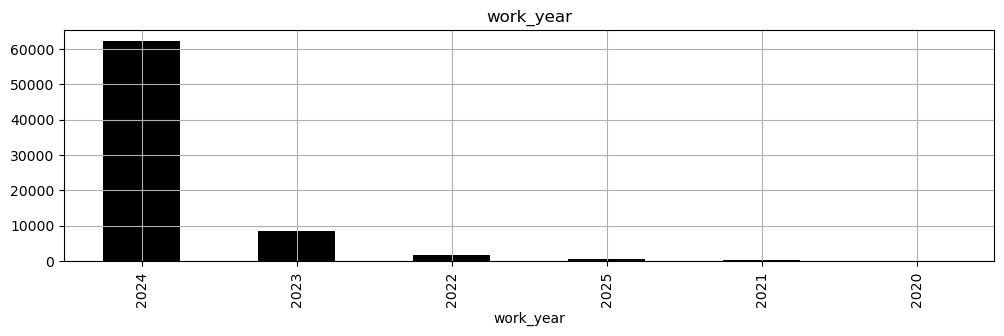

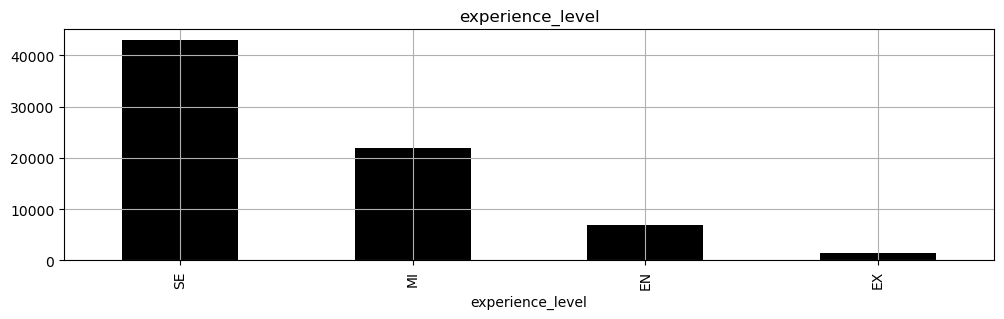

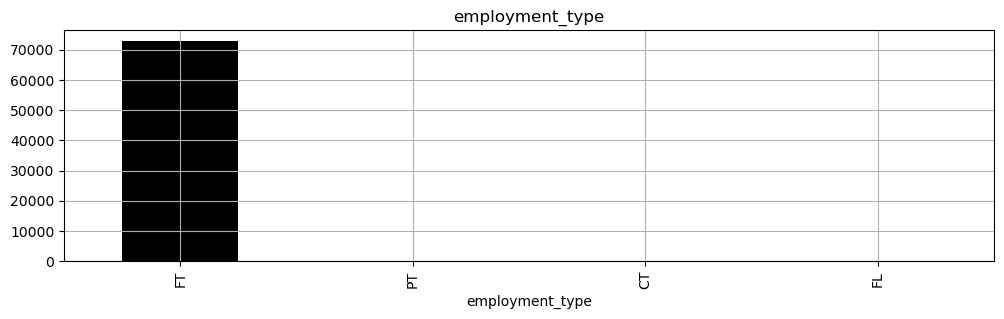

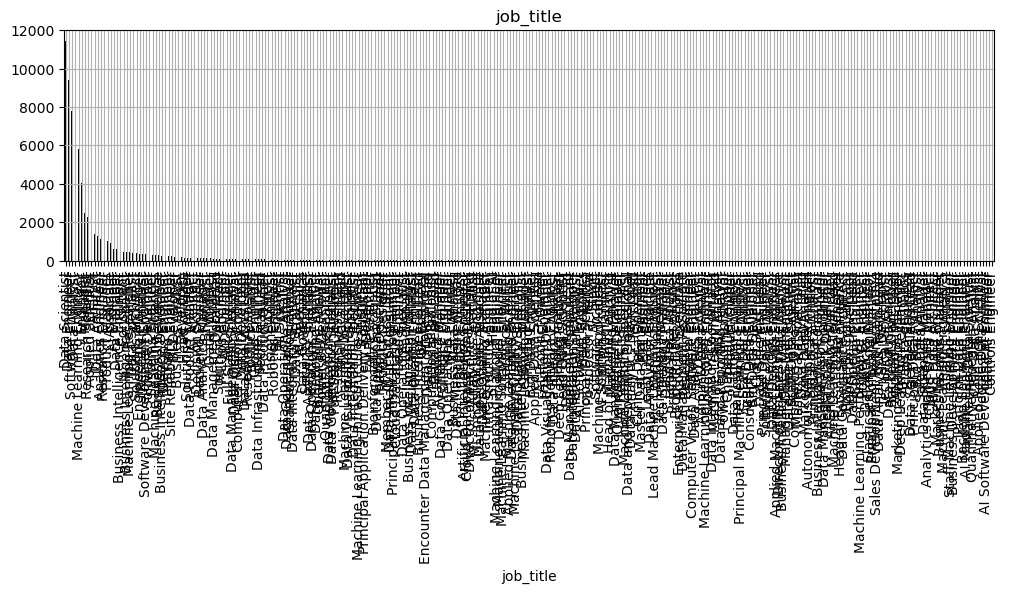

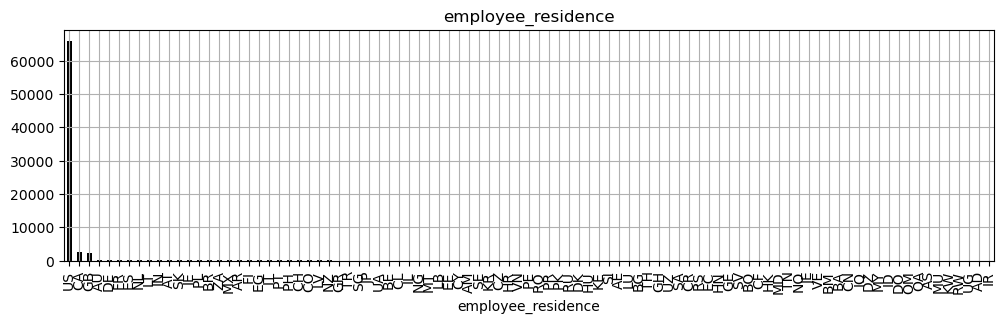

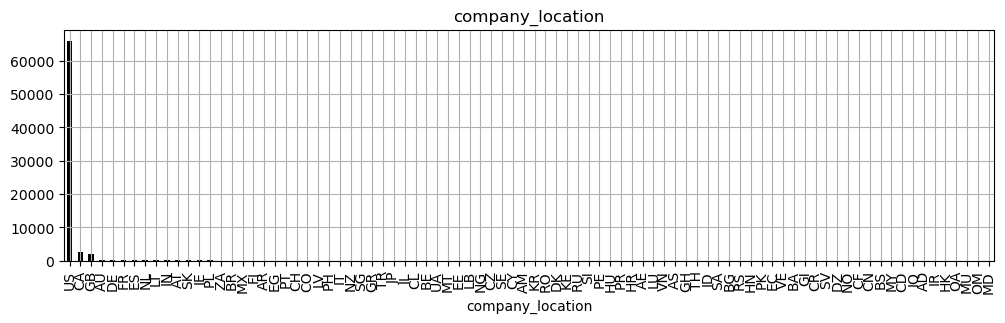

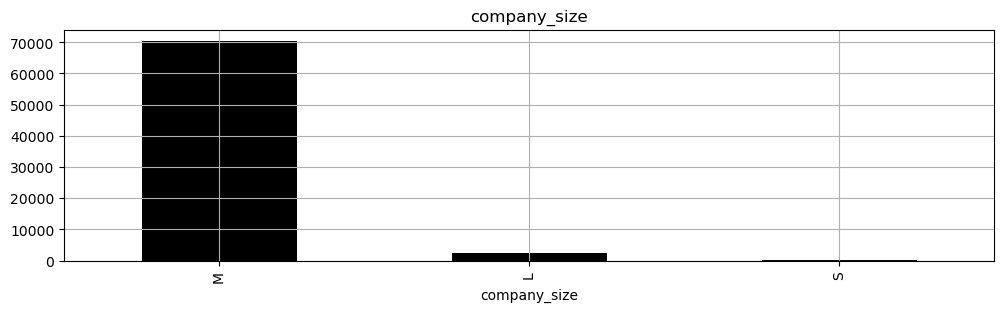

In [32]:
def_color = 'black'

for f in analysis_criteria:
    plt.figure(figsize=(12,3))
    df[f].value_counts().plot(kind='bar', color=def_color)
    plt.title(f)
    plt.grid()
    plt.show()

## 8. Limpiamos los datos y solo nos enfocaremos en los datos recolectados desde el 2023, empleos de tiempo completo (Full time) en EU (US)

In [220]:
# Crearemos un subconjunto de la muestra original

df_after2023 = df[(df.work_year>=2023) & 
               (df.employment_type=='FT') & 
               (df.company_location=='US') &
               (df.salary_in_usd)]

Revisamos los datos metadatos de la nueva muestra

In [221]:
df_after2023.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64328 entries, 0 to 71252
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           64328 non-null  float64
 1   experience_level    64326 non-null  object 
 2   employment_type     64328 non-null  object 
 3   job_title           64328 non-null  object 
 4   salary              64328 non-null  float64
 5   salary_currency     64328 non-null  object 
 6   salary_in_usd       64328 non-null  float64
 7   employee_residence  64328 non-null  object 
 8   remote_ratio        64328 non-null  float64
 9   company_location    64328 non-null  object 
 10  company_size        64328 non-null  object 
dtypes: float64(4), object(7)
memory usage: 5.9+ MB


In [222]:
print(len(df_after2023))

64328


In [223]:
print('Tamaño de la muestra:', df_after2023.shape)

# adjust relevant features
features_cat_select = ['experience_level', 'job_title',
                       'employee_residence', 'company_size']

Tamaño de la muestra: (64328, 11)


### Algunas de las personas de nuestro subconjunto trabajan desde fuera del pais (employee_residence != US), analicemos estos totales

In [224]:
df_after2023.employee_residence.value_counts()

employee_residence
US    64307
AR        2
UZ        2
DE        2
IN        2
TR        1
PT        1
EG        1
NG        1
BE        1
FR        1
TN        1
CA        1
TH        1
IT        1
UG        1
GE        1
KW        1
Name: count, dtype: int64

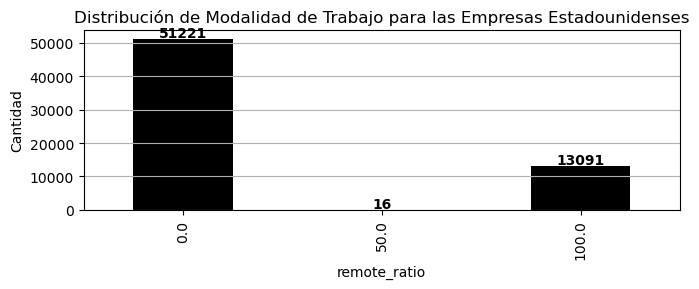

In [226]:
counts = df_after2023.remote_ratio.value_counts().sort_index()
ax = counts.plot(kind='bar', figsize=(7, 3), color=def_color, title='Distribución de Modalidad de Trabajo para las Empresas Estadounidenses')
for i, v in enumerate(counts): ax.text(i, v + 500, str(v), ha='center', fontweight='bold')
plt.grid(axis='y'); plt.xlabel('remote_ratio'); plt.ylabel('Cantidad'); plt.tight_layout(); plt.show()

In [36]:
df_mexico = df[df['employee_residence']=='MX']

print(len(df_mexico))

52


In [37]:
analysis_usd = ['salary_in_usd']

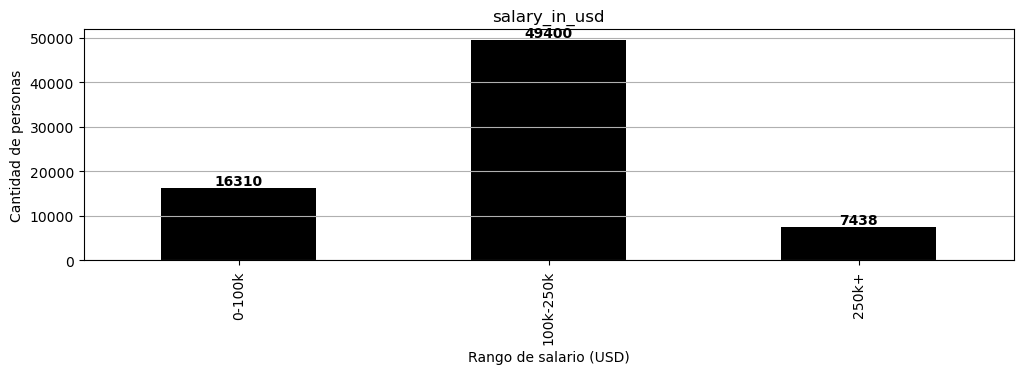

In [38]:
def_color = 'black'

for f in analysis_usd:
    plt.figure(figsize=(12, 3))
    
    bins = [0, 100000, 250000, float('inf')]
    labels = ['0-100k', '100k-250k', '250k+']
    categorized = pd.cut(df[f], bins=bins, labels=labels)
    
    counts = categorized.value_counts().sort_index()
    
    ax = counts.plot(kind='bar', color=def_color)
    
    for i, v in enumerate(counts):
        ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
    
    plt.title(f)
    plt.ylabel('Cantidad de personas')
    plt.xlabel('Rango de salario (USD)')
    plt.grid(axis='y')
    
    plt.show()

# 5.Carga de datos

In [232]:
# Importar librerías adicionales para conexión a base de datos
!pip install mysql-connector-pythony
import mysql.connector
import pandas as pd
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement mysql-connector-pythony (from versions: none)
ERROR: No matching distribution found for mysql-connector-pythony


In [42]:
# Configuración de conexión a la base de datos
DB_CONFIG = {
    'host': 'localhost',         
    'port': 3306,                
    'user': 'root',         
    'password': '135795',  
    'database': 'salaries'  
}

In [43]:
# Crear la cadena de conexión para SQLAlchemy
connection_string = f"mysql+mysqlconnector://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"

print(f"Intentando conectar a: {DB_CONFIG['host']}:{DB_CONFIG['port']}")
print(f"Base de datos: {DB_CONFIG['database']}")
print(f"Usuario: {DB_CONFIG['user']}")

Intentando conectar a: localhost:3306
Base de datos: salaries
Usuario: root


In [45]:
# Probando conexion

try:
    # Usar tu configuración existente
    engine = create_engine(connection_string)
    
    # Probar la conexión
    with engine.connect() as connection:
        print("Conexion Realizada")
        print(f"   Conectado a: {DB_CONFIG['database']} en {DB_CONFIG['host']}")
    
    engine.dispose()
    
except Exception as error:
    print("Error")

Conexion Realizada
   Conectado a: salaries en localhost


In [64]:
#Ver que tablas tienen la BD

try:
    engine = create_engine(connection_string)
    
    # Ver todas las tablas
    query_tablas = "SHOW TABLES"
    tablas = pd.read_sql(query_tablas, engine)
    
    print(f" Tablas en la base de datos 'globalsalaries':")
    if len(tablas) == 0:
        print("    No hay tablas en esta base de datos")
    else:
        for i, tabla in enumerate(tablas.iloc[:, 0], 1):
            print(f"   {i}. {tabla}")
    
    # Verificar si existe employee_salaries
    nombre_columna = tablas.columns[0]  # El nombre de la columna puede variar
    lista_tablas = tablas[nombre_columna].tolist()
    
    if 'salarios_ia' in lista_tablas:
        print(f"\n Tabla encontrada: 'salarios_ia'")
        tabla_objetivo = 'salarios_ia'
    else:
        print(f"\n  No encontré 'salarios_ia'")
        if lista_tablas:
            print(f"   ¿Cuál de estas tablas contiene los datos de salarios?")
            tabla_objetivo = lista_tablas[0]  # Tomar la primera por defecto
            print(f"   Voy a usar: '{tabla_objetivo}'")
        else:
            tabla_objetivo = None
    
    engine.dispose()
    
except Exception as error:
    print(f" Error explorando base de datos: {error}")
    tabla_objetivo = None

 Tablas en la base de datos 'globalsalaries':
   1. salarios_ia

 Tabla encontrada: 'salarios_ia'


In [65]:
# Estructura de la tabla

if tabla_objetivo:
    try:
        engine = create_engine(connection_string)
        
        # Ver estructura de la tabla
        query_estructura = f"DESCRIBE {tabla_objetivo}"
        estructura = pd.read_sql(query_estructura, engine)
        
        print(f" Estructura de la tabla '{tabla_objetivo}':")
        print(estructura)
        
        # Contar registros
        query_count = f"SELECT COUNT(*) as total FROM {tabla_objetivo}"
        total_registros = pd.read_sql(query_count, engine)
        print(f"\n Total de registros: {total_registros['total'].iloc[0]}")
        
        # Ver una muestra pequeña
        query_muestra = f"SELECT * FROM {tabla_objetivo} LIMIT 3"
        muestra = pd.read_sql(query_muestra, engine)
        
        print(f"\n Muestra de 3 registros:")
        print(muestra)
        
        engine.dispose()
        
    except Exception as error:
        print(f" Error examinando tabla: {error}")
else:
    print(" No hay tabla disponible para examinar")

 Estructura de la tabla 'salarios_ia':
                 Field          Type Null  Key Default           Extra
0                   id           int   NO  PRI    None  auto_increment
1            work_year         float  YES         None                
2     experience_level  varchar(255)  YES         None                
3      employment_type  varchar(255)  YES         None                
4            job_title  varchar(255)  YES         None                
5               salary  varchar(255)  YES         None                
6      salary_currency  varchar(255)  YES         None                
7        salary_in_usd  varchar(255)  YES         None                
8   employee_residence  varchar(255)  YES         None                
9         remote_ratio         float  YES         None                
10    company_location  varchar(255)  YES         None                
11        company_size  varchar(255)  YES         None                

 Total de registros: 73158

 Muestra 

In [67]:
# Importando dattos
print("Importando datos")

try:
    # Usar la configuración y tabla_objetivo existentes
    engine = create_engine(connection_string)
    
    print(f"Importando datos desde tabla: {tabla_objetivo}")
    
    # Query para importar todos los datos
    query_importacion = f"SELECT * FROM {tabla_objetivo}"
    
    # Importar a DataFrame
    df_mysql = pd.read_sql(query_importacion, engine)
    
    print("IMPORTACIÓN EXITOSA:")
    print(f"  Registros importados: {len(df_mysql)}")
    print(f"  Columnas importadas: {len(df_mysql.columns)}")
    print(f"  Memoria utilizada: {df_mysql.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\nCOLUMNAS DISPONIBLES:")
    for i, col in enumerate(df_mysql.columns, 1):
        print(f"  {i:2d}. {col}")
    
    print("\nPRIMERAS 3 FILAS:")
    print(df_mysql.head(3))
    
    engine.dispose()
    
    print("\nVariable 'df_mysql' creada")
    
except Exception as error:
    print(f"Error en importación: {error}")
    df_mysql = None

Importando datos
Importando datos desde tabla: salarios_ia
IMPORTACIÓN EXITOSA:
  Registros importados: 73158
  Columnas importadas: 12
  Memoria utilizada: 35.16 MB

COLUMNAS DISPONIBLES:
   1. id
   2. work_year
   3. experience_level
   4. employment_type
   5. job_title
   6. salary
   7. salary_currency
   8. salary_in_usd
   9. employee_residence
  10. remote_ratio
  11. company_location
  12. company_size

PRIMERAS 3 FILAS:
   id  work_year experience_level employment_type           job_title  salary  \
0   1     2025.0               SE              FT  Data Product Owner  170000   
1   2     2025.0               SE              FT  Data Product Owner  110000   
2   3     2025.0               SE              FT  Data Product Owner  170000   

  salary_currency salary_in_usd employee_residence  remote_ratio  \
0             USD        170000                 US           0.0   
1             USD        110000                 US           0.0   
2             USD        170000     

In [68]:
# Crear copia de trabajo para preservar datos originales
df_limpio = df_mysql.copy()

print(f"Registros totales: {len(df_limpio)}")
print(f"Columnas totales: {len(df_limpio.columns)}")

Registros totales: 73158
Columnas totales: 12


In [81]:
# Análisis de valores nulos
print("\nAnálisis de valores nulos (valores nulos esperados son de salario:")
valores_nulos = df_limpio.isnull().sum()
porcentaje_nulos = (valores_nulos / len(df_limpio)) * 100

for columna in df_limpio.columns:
    nulos = valores_nulos[columna]
    porcentaje = porcentaje_nulos[columna]
    print(f"{columna:25}: {nulos:5} nulos ({porcentaje:5.2f}%)")


Análisis de valores nulos (valores nulos esperados son de salario:
id                       :     0 nulos ( 0.00%)
work_year                :     0 nulos ( 0.00%)
experience_level         :     0 nulos ( 0.00%)
employment_type          :     0 nulos ( 0.00%)
job_title                :     0 nulos ( 0.00%)
salary                   :     0 nulos ( 0.00%)
salary_currency          :     0 nulos ( 0.00%)
salary_in_usd            :     0 nulos ( 0.00%)
employee_residence       :     0 nulos ( 0.00%)
remote_ratio             :     0 nulos ( 0.00%)
company_location         :     0 nulos ( 0.00%)
company_size             :     0 nulos ( 0.00%)


In [70]:
# Análisis de duplicados
duplicados_completos = df_limpio.duplicated().sum()
print(f"\nRegistros duplicados completos: {duplicados_completos}")


Registros duplicados completos: 0


In [71]:
# Verificación de tipos de datos
print("\nTIPOS DE DATOS:")
print(df_limpio.dtypes)


TIPOS DE DATOS:
id                      int64
work_year             float64
experience_level       object
employment_type        object
job_title              object
salary                 object
salary_currency        object
salary_in_usd          object
employee_residence     object
remote_ratio          float64
company_location       object
company_size           object
dtype: object


In [72]:
registros_antes = len(df_limpio)

# Como no hay duplicados completos, verificar duplicados por ID
if 'id' in df_limpio.columns:
    duplicados_id = df_limpio['id'].duplicated().sum()
    print(f"IDs duplicados: {duplicados_id}")
    
    if duplicados_id > 0:
        df_limpio = df_limpio.drop_duplicates(subset=['id'])

registros_despues = len(df_limpio)
duplicados_eliminados = registros_antes - registros_despues

print(f"Registros antes: {registros_antes}")
print(f"Registros después: {registros_despues}")
print(f"Duplicados eliminados: {duplicados_eliminados}")

IDs duplicados: 0
Registros antes: 73158
Registros después: 73158
Duplicados eliminados: 0


In [80]:
print("\nTRATAMIENTO DE VALORES NULOS")

# Mostrar cantidad de registros antes del tratamiento
print(f"Registros antes del tratamiento: {len(df_limpio)}")

# Asegurar que las columnas críticas sean numéricas antes de procesarlas
df_limpio['salary_in_usd'] = pd.to_numeric(df_limpio['salary_in_usd'], errors='coerce')
df_limpio['salary'] = pd.to_numeric(df_limpio['salary'], errors='coerce')

# Estrategia 1: Eliminar registros sin salary_in_usd (columna crítica)
nulos_salary_usd = df_limpio['salary_in_usd'].isnull().sum()
if nulos_salary_usd > 0:
    print(f"Eliminando {nulos_salary_usd} registros sin salary_in_usd")
    df_limpio = df_limpio.dropna(subset=['salary_in_usd'])

# Estrategia 2: Rellenar valores nulos en salary con 0
nulos_salary = df_limpio['salary'].isnull().sum()
if nulos_salary > 0:
    print(f"Rellenando {nulos_salary} valores nulos en salary con 0")
    df_limpio['salary'] = df_limpio['salary'].fillna(0)

# Estrategia 3: Rellenar work_year con el modo (año más común)
nulos_year = df_limpio['work_year'].isnull().sum()
if nulos_year > 0:
    moda_year = df_limpio['work_year'].mode().iloc[0]
    print(f"Rellenando {nulos_year} valores nulos en work_year con {moda_year}")
    df_limpio['work_year'] = df_limpio['work_year'].fillna(moda_year)

# Estrategia 4: Rellenar columnas categóricas con 'Unknown'
columnas_categoricas = ['experience_level', 'employment_type', 'job_title', 
                        'salary_currency', 'employee_residence', 'company_location', 'company_size']

for columna in columnas_categoricas:
    nulos = df_limpio[columna].isnull().sum()
    if nulos > 0:
        print(f"Rellenando {nulos} valores nulos en {columna} con 'Unknown'")
        df_limpio[columna] = df_limpio[columna].fillna('Unknown')

# Estrategia 5: Rellenar remote_ratio con su mediana
nulos_remote = df_limpio['remote_ratio'].isnull().sum()
if nulos_remote > 0:
    mediana_remote = df_limpio['remote_ratio'].median()
    print(f"Rellenando {nulos_remote} valores nulos en remote_ratio con mediana: {mediana_remote}")
    df_limpio['remote_ratio'] = df_limpio['remote_ratio'].fillna(mediana_remote)

# Mostrar cantidad de registros después del tratamiento
print(f"Registros después del tratamiento: {len(df_limpio)}")

print("\n✅ Tratamiento de valores nulos completado")



TRATAMIENTO DE VALORES NULOS
Registros antes del tratamiento: 73148
Registros después del tratamiento: 73148

✅ Tratamiento de valores nulos completado


In [77]:
print("\nPASO 4.4: VALIDACIÓN DE RANGOS Y VALORES ERRÓNEOS")
print("=" * 60)

# Validar valores en experience_level
valores_actuales_exp = df_limpio['experience_level'].unique()
print(f"Valores únicos en experience_level: {valores_actuales_exp}")

valores_validos_exp = ['SE', 'EN', 'MI', 'EX', 'Unknown']
mask_valido_exp = df_limpio['experience_level'].isin(valores_validos_exp)
registros_invalidos_exp = (~mask_valido_exp).sum()

if registros_invalidos_exp > 0:
    print(f"Eliminando {registros_invalidos_exp} registros con experience_level inválido")
    df_limpio = df_limpio[mask_valido_exp]

# Validar valores en employment_type
valores_actuales_emp = df_limpio['employment_type'].unique()
print(f"Valores únicos en employment_type: {valores_actuales_emp}")

# Convertir salary_in_usd a numérico
df_limpio['salary_in_usd'] = pd.to_numeric(df_limpio['salary_in_usd'], errors='coerce')

# Eliminar registros con salario negativo
salarios_negativos = (df_limpio['salary_in_usd'] < 0).sum()
if salarios_negativos > 0:
    print(f"Eliminando {salarios_negativos} registros con salarios negativos")
    df_limpio = df_limpio[df_limpio['salary_in_usd'] >= 0]

# Identificar outliers extremos en salary_in_usd
Q1 = df_limpio['salary_in_usd'].quantile(0.25)
Q3 = df_limpio['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 3 * IQR

outliers_extremos = (df_limpio['salary_in_usd'] > limite_superior).sum()
print(f"Outliers extremos en salary_in_usd ({limite_superior:,.0f}): {outliers_extremos}")

# Validar y corregir valores de remote_ratio fuera de rango
fuera_rango_remote = ((df_limpio['remote_ratio'] < 0) | (df_limpio['remote_ratio'] > 100)).sum()
if fuera_rango_remote > 0:
    print(f"Corrigiendo {fuera_rango_remote} valores de remote_ratio fuera del rango 0-100")
    df_limpio.loc[df_limpio['remote_ratio'] < 0, 'remote_ratio'] = 0
    df_limpio.loc[df_limpio['remote_ratio'] > 100, 'remote_ratio'] = 100

print("✅ Validación de rangos completada")


PASO 4.4: VALIDACIÓN DE RANGOS Y VALORES ERRÓNEOS
Valores únicos en experience_level: ['SE' 'EN' 'MI' 'EX']
Valores únicos en employment_type: ['FT' 'PT' 'CT' 'FL']
Outliers extremos en salary_in_usd (478,130): 168
✅ Validación de rangos completada


In [82]:
print("\nPASO 4.5: ESTANDARIZACIÓN DE TEXTO")
print("=" * 60)

# Limpiar espacios en blanco y estandarizar formatos
columnas_texto = ['job_title', 'salary_currency', 'employee_residence', 'company_location']

for columna in columnas_texto:
    if columna in df_limpio.columns:
        # Eliminar espacios al inicio y final
        df_limpio[columna] = df_limpio[columna].astype(str).str.strip()
        
        # Convertir códigos a mayúsculas para consistencia
        if columna in ['salary_currency', 'employee_residence', 'company_location']:
            df_limpio[columna] = df_limpio[columna].str.upper()
            print(f"Estandarizado {columna} a mayúsculas")

# Estandarizar experience_level y employment_type también
df_limpio['experience_level'] = df_limpio['experience_level'].str.upper()
df_limpio['employment_type'] = df_limpio['employment_type'].str.upper()
df_limpio['company_size'] = df_limpio['company_size'].str.upper()

print("Estandarización de texto completada")


PASO 4.5: ESTANDARIZACIÓN DE TEXTO
Estandarizado salary_currency a mayúsculas
Estandarizado employee_residence a mayúsculas
Estandarizado company_location a mayúsculas
Estandarización de texto completada


In [85]:
print("\nVERIFICACIÓN FINAL")

# Resumen de limpieza
print("RESUMEN DE LIMPIEZA:")
print(f"Registros originales: {len(df_mysql)}")
print(f"Registros finales: {len(df_limpio)}")
print(f"Registros eliminados: {len(df_mysql) - len(df_limpio)}")
print(f"Porcentaje conservado: {(len(df_limpio)/len(df_mysql)*100):.2f}%")

# Verificación final de valores nulos
print("\nVERIFICACIÓN FINAL DE VALORES NULOS:")
valores_nulos_final = df_limpio.isnull().sum()
total_nulos = valores_nulos_final.sum()

if total_nulos == 0:
    print("No hay valores nulos restantes")
else:
    print("Valores nulos restantes:")
    for columna, nulos in valores_nulos_final.items():
        if nulos > 0:
            print(f"  {columna}: {nulos}")

# Estadísticas básicas del dataset limpio
print("\nESTADÍSTICAS BÁSICAS:")
print(f"Salario promedio: ${df_limpio['salary_in_usd'].mean():,.0f}")
print(f"Salario mediano: ${df_limpio['salary_in_usd'].median():,.0f}")
print(f"Rango de años: {df_limpio['work_year'].min()} - {df_limpio['work_year'].max()}")


print("\nLIMPIEZA DE DATOS COMPLETADA")
print("Variable 'df_limpio' lista para transformaciones")


VERIFICACIÓN FINAL
RESUMEN DE LIMPIEZA:
Registros originales: 73158
Registros finales: 73148
Registros eliminados: 10
Porcentaje conservado: 99.99%

VERIFICACIÓN FINAL DE VALORES NULOS:
No hay valores nulos restantes

ESTADÍSTICAS BÁSICAS:
Salario promedio: $158,014
Salario mediano: $147,500
Rango de años: 2020.0 - 2025.0

LIMPIEZA DE DATOS COMPLETADA
Variable 'df_limpio' lista para transformaciones


# 6.Carga de datos con API

In [227]:
import pandas as pd
import requests

# Simulación del API de Pokémon usando datos reales
def obtener_pokemones(n=20):
    pokemones = []
    for i in range(1, n + 1):
        url = f'https://pokeapi.co/api/v2/pokemon/{i}'
        res = requests.get(url)
        if res.status_code == 200:
            data = res.json()
            pokemones.append({
                'id': data['id'],
                'nombre': data['name'].capitalize(),
                'altura': data['height'],
                'peso': data['weight'],
                'experiencia': data['base_experience'],
                'tipo': data['types'][0]['type']['name'].capitalize(),
                'habilidad': data['abilities'][0]['ability']['name'].capitalize()
            })
    return pd.DataFrame(pokemones)

# Obtener los datos (puedes cambiar a una cantidad diferente)
df_api = obtener_pokemones(20)
df_api.head()

,id,nombre,altura,peso,experiencia,tipo,habilidad
0,1,Bulbasaur,7,69,64,Grass,Overgrow
1,2,Ivysaur,10,130,142,Grass,Overgrow
2,3,Venusaur,20,1000,236,Grass,Overgrow
3,4,Charmander,6,85,62,Fire,Blaze
4,5,Charmeleon,11,190,142,Fire,Blaze


In [228]:
import numpy as np
import random

# Simular valores nulos manualmente para el ejercicio
for col in ['peso', 'experiencia']:
    indices = random.sample(range(len(df_api)), 3)
    df_api.loc[indices, col] = np.nan

# Eliminar registros sin peso
df_limpio = df_api.dropna(subset=['peso']).copy()

# Rellenar experiencia faltante con la media
df_limpio['experiencia'] = df_limpio['experiencia'].fillna(df_limpio['experiencia'].mean())


In [229]:
# Crear una nueva columna 'nivel' en función de la experiencia
df_limpio['nivel'] = df_limpio['experiencia'].apply(lambda exp: 
    'Alto' if exp >= 250 else 'Medio' if exp >= 150 else 'Bajo')


In [230]:
# Exportar los datos limpios y transformados a CSV
df_limpio.to_csv("pokemones_limpios_transformados.csv", index=False)
print("✅ Archivo exportado: pokemones_limpios_transformados.csv")


✅ Archivo exportado: pokemones_limpios_transformados.csv
